In [18]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

IMAGE_FORMAT = 'eps'
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/master_file_vflag.txt', 
                          format='ascii.ecsv')


plt.rc('font', size=16)
lwidth = 2 # Line width used in plots
msize = 3  # Marker size used in plots


###########################################################################
# Hard-coded entry for the bins for the histrogram plots at the end of this
#    function.
#--------------------------------------------------------------------------
hist_range = ( 0, 1500)
BINS = np.linspace( hist_range[0], hist_range[1], 15)
###########################################################################

In [13]:
'''
###########################################################################
# Import the necessary data from the master_file.
#--------------------------------------------------------------------------
vflag_list = master_table['vflag']

avg_chi_square_rot_master = master_table['chi_square_rot']
pos_chi_square_rot_master = master_table['pos_chi_square_rot']
neg_chi_square_rot_master = master_table['neg_chi_square_rot']

mass_ratio_master = master_table['dmMass_to_sMass_ratio']
###########################################################################


###########################################################################
# Initialize the arrays to store the chi square values.
#
# NOTE: chi square values are separated into difference histograms by the
#       average of the two rotation curves and the positive and negative
#       rotation curves.
# NOTE: within these histograms, galaxies are separated by those in walls,
#       those in voids, and other.
#--------------------------------------------------------------------------
avg_chi_square_rot_wall = []
avg_chi_square_rot_void = []
avg_chi_square_rot_other = []
pos_chi_square_rot_wall = []
pos_chi_square_rot_void = []
pos_chi_square_rot_other = []
neg_chi_square_rot_wall = []
neg_chi_square_rot_void = []
neg_chi_square_rot_other = []
###########################################################################
'''


###########################################################################
# For each galaxy in the master_table, separate the chi square values by
#    if the galaxy is within a wall, a void, or other.
#--------------------------------------------------------------------------
vboolean = master_table['vflag'] == 1
wboolean = master_table['vflag'] == 0
eboolean = np.logical_not(np.logical_and(vboolean, wboolean))

avg_chi_square_rot_void = master_table['chi_square_rot'][vboolean]
avg_chi_square_rot_wall = master_table['chi_square_rot'][wboolean]
avg_chi_square_rot_other = master_table['chi_square_rot'][eboolean]

pos_chi_square_rot_void = master_table['pos_chi_square_rot'][vboolean]
pos_chi_square_rot_wall = master_table['pos_chi_square_rot'][wboolean]
pos_chi_square_rot_other = master_table['pos_chi_square_rot'][eboolean]

neg_chi_square_rot_void = master_table['neg_chi_square_rot'][vboolean]
neg_chi_square_rot_wall = master_table['neg_chi_square_rot'][wboolean]
neg_chi_square_rot_other = master_table['neg_chi_square_rot'][eboolean]

mass_ratio_void = master_table['dmMass_to_sMass_ratio'][vboolean]
mass_ratio_wall = master_table['dmMass_to_sMass_ratio'][wboolean]
mass_ratio_other = master_table['dmMass_to_sMass_ratio'][eboolean]

'''
for vflag, chi_square, pos_chi_square, neg_chi_square \
  in zip( vflag_list, avg_chi_square_rot_master,
         pos_chi_square_rot_master, neg_chi_square_rot_master):
    if vflag == 0:
        avg_chi_square_rot_wall.append( chi_square)
        pos_chi_square_rot_wall.append( pos_chi_square)
        neg_chi_square_rot_wall.append( neg_chi_square)

    elif vflag == 1:
        avg_chi_square_rot_void.append( chi_square)
        pos_chi_square_rot_void.append( pos_chi_square)
        neg_chi_square_rot_void.append( neg_chi_square)

    elif vflag == 2 or vflag == -9:
        avg_chi_square_rot_other.append( chi_square)
        pos_chi_square_rot_other.append( pos_chi_square)
        neg_chi_square_rot_other.append( neg_chi_square)
'''
###########################################################################

'''
###########################################################################
# Calculate the mean, RMS, and standard deviation for the void, wall, and
#    total distributions in the average, positive and negative, histograms
#    below.
#--------------------------------------------------------------------------
avg_chi_square_rot_wall_mean = np.mean( avg_chi_square_rot_wall)
avg_chi_square_rot_void_mean = np.mean( avg_chi_square_rot_void)
avg_chi_square_rot_other_mean = np.mean( avg_chi_square_rot_other)
avg_chi_square_rot_wall_stdev = np.std( avg_chi_square_rot_wall)
avg_chi_square_rot_void_stdev = np.std( avg_chi_square_rot_void)
avg_chi_square_rot_other_stdev = np.std( avg_chi_square_rot_other)
avg_chi_square_rot_wall_rms = np.sqrt( np.mean( avg_chi_square_rot_wall**2))
avg_chi_square_rot_void_rms = np.sqrt( np.mean( avg_chi_square_rot_void**2))
avg_chi_square_rot_other_rms = np.sqrt( np.mean( avg_chi_square_rot_other**2))

pos_chi_square_rot_wall_mean = np.mean( pos_chi_square_rot_wall)
pos_chi_square_rot_void_mean = np.mean( pos_chi_square_rot_void)
pos_chi_square_rot_other_mean = np.mean( pos_chi_square_rot_other)
pos_chi_square_rot_wall_stdev = np.std( pos_chi_square_rot_wall)
pos_chi_square_rot_void_stdev = np.std( pos_chi_square_rot_void)
pos_chi_square_rot_other_stdev = np.std( pos_chi_square_rot_other)
pos_chi_square_rot_wall_rms = np.sqrt( np.mean( pos_chi_square_rot_wall**2))
pos_chi_square_rot_void_rms = np.sqrt( np.mean( pos_chi_square_rot_void**2))
pos_chi_square_rot_other_rms = np.sqrt( np.mean( pos_chi_square_rot_other**2))

neg_chi_square_rot_wall_mean = np.mean( neg_chi_square_rot_wall)
neg_chi_square_rot_void_mean = np.mean( neg_chi_square_rot_void)
neg_chi_square_rot_other_mean = np.mean( neg_chi_square_rot_other)
neg_chi_square_rot_wall_stdev = np.std( neg_chi_square_rot_wall)
neg_chi_square_rot_void_stdev = np.std( neg_chi_square_rot_void)
neg_chi_square_rot_other_stdev = np.std( neg_chi_square_rot_other)
neg_chi_square_rot_wall_rms = np.sqrt( np.mean( neg_chi_square_rot_wall**2))
neg_chi_square_rot_void_rms = np.sqrt( np.mean( neg_chi_square_rot_void**2))
neg_chi_square_rot_other_rms = np.sqrt( np.mean( neg_chi_square_rot_other**2))
###########################################################################


###########################################################################
# Variables that are used in the fitting of the gaussian are located
#    directly below.
#--------------------------------------------------------------------------
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
###########################################################################
'''

'\n###########################################################################\n# Calculate the mean, RMS, and standard deviation for the void, wall, and\n#    total distributions in the average, positive and negative, histograms\n#    below.\n#--------------------------------------------------------------------------\navg_chi_square_rot_wall_mean = np.mean( avg_chi_square_rot_wall)\navg_chi_square_rot_void_mean = np.mean( avg_chi_square_rot_void)\navg_chi_square_rot_other_mean = np.mean( avg_chi_square_rot_other)\navg_chi_square_rot_wall_stdev = np.std( avg_chi_square_rot_wall)\navg_chi_square_rot_void_stdev = np.std( avg_chi_square_rot_void)\navg_chi_square_rot_other_stdev = np.std( avg_chi_square_rot_other)\navg_chi_square_rot_wall_rms = np.sqrt( np.mean( avg_chi_square_rot_wall**2))\navg_chi_square_rot_void_rms = np.sqrt( np.mean( avg_chi_square_rot_void**2))\navg_chi_square_rot_other_rms = np.sqrt( np.mean( avg_chi_square_rot_other**2))\n\npos_chi_square_rot_wall_mean = np.mean( p

## Distribution of chi-square

"\nplt.savefig( IMAGE_DIR + '/histograms/avg_chi_square_hist.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

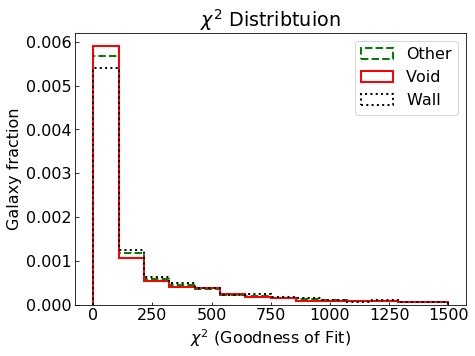

In [24]:
###########################################################################
# Plot the chi square distribution for the average chi rotation curve and
#    separate the distributions into walls and voids.
#--------------------------------------------------------------------------
#avg_chi_square_rot_hist = plt.figure()
plt.figure(figsize=(7,5))
plt.title("$\chi^2$ Distribtuion")
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -

plt.hist( avg_chi_square_rot_other, BINS, color='g', density=True, 
         histtype='step', linewidth=lwidth, linestyle='--', label='Other')
# p = norm.pdf(x,
#              avg_chi_square_rot_other_mean, avg_chi_square_rot_other_stdev)
# plt.plot(x, p, 'g--', linewidth=2)
# plt.axvline( avg_chi_square_rot_other_mean,
#             color='green', linestyle='-', linewidth=1.5)
# plt.axvline(
#         avg_chi_square_rot_other_mean + avg_chi_square_rot_other_stdev,
#         color='green', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_other_mean - avg_chi_square_rot_other_stdev,
#         color='green', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_other_mean + 2*avg_chi_square_rot_other_stdev,
#         color='green', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_other_mean - 2*avg_chi_square_rot_other_stdev,
#         color='green', linestyle=':', linewidth=1)
# _, mean_avg_chi_square_rot_other_ = plt.ylim()
# plt.text(avg_chi_square_rot_other_mean + avg_chi_square_rot_other_mean/10,
#      mean_avg_chi_square_rot_other_ - mean_avg_chi_square_rot_other_/10,
#      'Mean: {:.2f}'.format( avg_chi_square_rot_other_mean))


plt.hist( avg_chi_square_rot_void, BINS, color='r', density=True, 
         histtype='step', linewidth=lwidth, label='Void')
# p = norm.pdf(x,
#              avg_chi_square_rot_void_mean, avg_chi_square_rot_void_stdev)
# plt.plot(x, p, 'r--', linewidth=2)
# plt.axvline( avg_chi_square_rot_void_mean,
#             color='red', linestyle='-', linewidth=1.5)
# plt.axvline( avg_chi_square_rot_void_mean + avg_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( avg_chi_square_rot_void_mean - avg_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_void_mean + 2*avg_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_void_mean - 2*avg_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# _, mean_void_avg_chi_square_rot_ = plt.ylim()
# plt.text(avg_chi_square_rot_void_mean + avg_chi_square_rot_void_mean/10,
#      mean_void_avg_chi_square_rot_ - mean_void_avg_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( avg_chi_square_rot_void_mean))


plt.hist( avg_chi_square_rot_wall, BINS, color='k', density=True, 
         histtype='step', linewidth=lwidth, linestyle=':', label='Wall')
# p = norm.pdf(x,
#              avg_chi_square_rot_wall_mean, avg_chi_square_rot_wall_stdev)
# plt.plot(x, p, 'k--', linewidth=2)
# plt.axvline( avg_chi_square_rot_wall_mean,
#             color='black', linestyle='-', linewidth=1.5)
# plt.axvline( avg_chi_square_rot_wall_mean + avg_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( avg_chi_square_rot_wall_mean - avg_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_wall_mean + 2*avg_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         avg_chi_square_rot_wall_mean - 2*avg_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# _, mean_wall_avg_chi_square_rot_ = plt.ylim()
# plt.text(avg_chi_square_rot_wall_mean + avg_chi_square_rot_wall_mean/10,
#      mean_wall_avg_chi_square_rot_ - mean_wall_avg_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( avg_chi_square_rot_wall_mean))


#ax = avg_chi_square_rot_hist.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel('$\chi^2$ (Goodness of Fit)')
plt.legend()

# textstr = '\n'.join((
#       r'STDEV: $%.2f$' % ( avg_chi_square_rot_other_stdev, ),
#       r'$STDEV_{wall}$: $%.2f$' % ( avg_chi_square_rot_wall_stdev, ),
#       r'$STDEV_{void}$: $%.2f$' % ( avg_chi_square_rot_void_stdev, ),
#       r'RMS: $%.2f$' % ( avg_chi_square_rot_other_rms, ),
#       r'$RMS_{wall}$: $%.2f$' % ( avg_chi_square_rot_wall_rms, ),
#       r'$RMS_{void}$: $%.2f$' % ( avg_chi_square_rot_void_rms, )))

# props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

# ax.text(0.72, 0.95, textstr,
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax.transAxes,
#         color='black', fontsize=8, bbox=props)

'''
plt.savefig( IMAGE_DIR + '/histograms/avg_chi_square_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Distribution of chi square for positive curves

"\nplt.savefig( IMAGE_DIR + '/histograms/pos_chi_square_hist.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

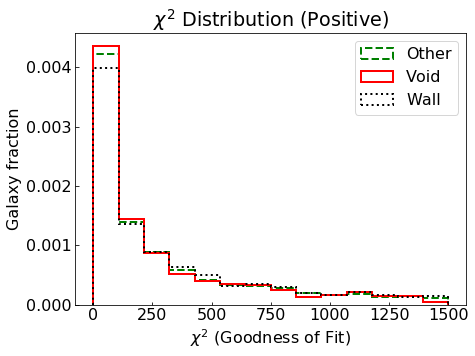

In [15]:
###########################################################################
# Plot the chi square distribution for the maximum chi rotation curve and
#    separate the distributions into walls and voids.
#--------------------------------------------------------------------------
#pos_chi_square_rot_hist = plt.figure()
plt.figure(figsize=(7,5))
plt.title("$\chi^2$ Distribution (Positive)")
# -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
plt.hist( pos_chi_square_rot_other, BINS, color='g', density=True, 
         histtype='step', linewidth=lwidth, linestyle='--', label='Other')
# p = norm.pdf(x,
#              pos_chi_square_rot_other_mean, pos_chi_square_rot_other_stdev)
# plt.plot(x, p, color='purple', linestyle='--', linewidth=2)
# plt.axvline( pos_chi_square_rot_other_mean,
#             color='purple', linestyle='-', linewidth=1.5)
# plt.axvline(
#         pos_chi_square_rot_other_mean + pos_chi_square_rot_other_stdev,
#         color='purple', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_other_mean - pos_chi_square_rot_other_stdev,
#         color='purple', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_other_mean + 2*pos_chi_square_rot_other_stdev,
#         color='purple', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_other_mean - 2*pos_chi_square_rot_other_stdev,
#         color='purple', linestyle=':', linewidth=1)
# _, mean_pos_chi_square_rot_other_ = plt.ylim()
# plt.text(pos_chi_square_rot_other_mean + pos_chi_square_rot_other_mean/10,
#      mean_pos_chi_square_rot_other_ - mean_pos_chi_square_rot_other_/10,
#      'Mean: {:.2f}'.format( pos_chi_square_rot_other_mean))


plt.hist( pos_chi_square_rot_void, BINS, color='r', density=True, 
         histtype='step', linewidth=lwidth, label='Void')
# p = norm.pdf(x,
#              pos_chi_square_rot_void_mean, pos_chi_square_rot_void_stdev)
# plt.plot(x, p, 'r--', linewidth=2)
# plt.axvline( pos_chi_square_rot_void_mean,
#             color='red', linestyle='-', linewidth=1.5)
# plt.axvline( pos_chi_square_rot_void_mean + pos_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( pos_chi_square_rot_void_mean - pos_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_void_mean + 2*pos_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_void_mean - 2*pos_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# _, mean_void_pos_chi_square_rot_ = plt.ylim()
# plt.text(pos_chi_square_rot_void_mean + pos_chi_square_rot_void_mean/10,
#      mean_void_pos_chi_square_rot_ - mean_void_pos_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( pos_chi_square_rot_void_mean))


plt.hist( pos_chi_square_rot_wall, BINS, color='k', density=True, 
         histtype='step', linewidth=lwidth, linestyle=':', label='Wall')
# p = norm.pdf(x,
#              pos_chi_square_rot_wall_mean, pos_chi_square_rot_wall_stdev)
# plt.plot(x, p, 'k--', linewidth=2)
# plt.axvline( pos_chi_square_rot_wall_mean,
#             color='black', linestyle='-', linewidth=1.5)
# plt.axvline( pos_chi_square_rot_wall_mean + pos_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( pos_chi_square_rot_wall_mean - pos_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_wall_mean + 2*pos_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         pos_chi_square_rot_wall_mean - 2*pos_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# _, mean_wall_pos_chi_square_rot_ = plt.ylim()
# plt.text(pos_chi_square_rot_wall_mean + pos_chi_square_rot_wall_mean/10,
#      mean_wall_pos_chi_square_rot_ - mean_wall_pos_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( pos_chi_square_rot_wall_mean))


#ax = pos_chi_square_rot_hist.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel('$\chi^2$ (Goodness of Fit)')
plt.legend()

# textstr = '\n'.join((
#       r'STDEV: $%.2f$' % ( pos_chi_square_rot_other_stdev, ),
#       r'$STDEV_{wall}$: $%.2f$' % ( pos_chi_square_rot_wall_stdev, ),
#       r'$STDEV_{void}$: $%.2f$' % ( pos_chi_square_rot_void_stdev, ),
#       r'RMS: $%.2f$' % ( pos_chi_square_rot_other_rms, ),
#       r'$RMS_{wall}$: $%.2f$' % ( pos_chi_square_rot_wall_rms, ),
#       r'$RMS_{void}$: $%.2f$' % ( pos_chi_square_rot_void_rms, )))

# props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

# ax.text(0.72, 0.95, textstr,
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax.transAxes,
#         color='black', fontsize=8, bbox=props)

'''
plt.savefig( IMAGE_DIR + '/histograms/pos_chi_square_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Distribution of chi square for negative rotation curve

"\nplt.savefig( IMAGE_DIR + '/histograms/neg_chi_square_hist.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

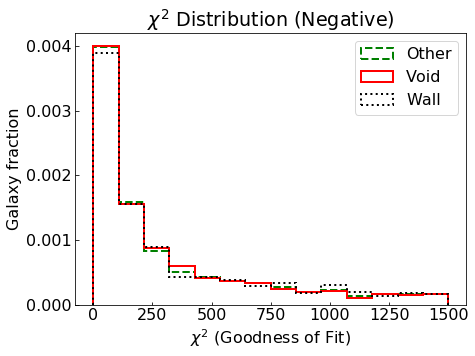

In [16]:
###########################################################################
# Plot the chi square distribution for the negative rotation curve and
#    separate the distributions into walls and voids.
#--------------------------------------------------------------------------
#neg_chi_square_rot_hist = plt.figure()
plt.figure(figsize=(7,5))
plt.title("$\chi^2$ Distribution (Negative)")


plt.hist( neg_chi_square_rot_other, BINS, color='g', density=True, 
         histtype='step', linewidth=lwidth, linestyle='--', label='Other')
# p = norm.pdf(x,
#              neg_chi_square_rot_other_mean, neg_chi_square_rot_other_stdev)
# plt.plot(x, p, 'g--', linewidth=2)
# plt.axvline( neg_chi_square_rot_other_mean,
#             color='blue', linestyle='-', linewidth=1.5)
# plt.axvline(
#         neg_chi_square_rot_other_mean + neg_chi_square_rot_other_stdev,
#         color='blue', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_other_mean - neg_chi_square_rot_other_stdev,
#         color='blue', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_other_mean + 2*neg_chi_square_rot_other_stdev,
#         color='blue', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_other_mean - 2*neg_chi_square_rot_other_stdev,
#         color='blue', linestyle=':', linewidth=1)
# _, mean_neg_chi_square_rot_other_ = plt.ylim()
# plt.text(neg_chi_square_rot_other_mean + neg_chi_square_rot_other_mean/10,
#      mean_neg_chi_square_rot_other_ - mean_neg_chi_square_rot_other_/10,
#      'Mean: {:.2f}'.format( neg_chi_square_rot_other_mean))


plt.hist( neg_chi_square_rot_void, BINS, color='r', density=True, 
         histtype='step', linewidth=lwidth, label='Void')
# p = norm.pdf(x,
#              neg_chi_square_rot_void_mean, neg_chi_square_rot_void_stdev)
# plt.plot(x, p, 'r--', linewidth=2)
# plt.axvline( neg_chi_square_rot_void_mean,
#             color='red', linestyle='-', linewidth=1.5)
# plt.axvline( neg_chi_square_rot_void_mean + neg_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( neg_chi_square_rot_void_mean - neg_chi_square_rot_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_void_mean + 2*neg_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_void_mean - 2*neg_chi_square_rot_void_stdev,
#         color='red', linestyle=':', linewidth=1)
# _, mean_void_neg_chi_square_rot_ = plt.ylim()
# plt.text(neg_chi_square_rot_void_mean + neg_chi_square_rot_void_mean/10,
#      mean_void_neg_chi_square_rot_ - mean_void_neg_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( neg_chi_square_rot_void_mean))


plt.hist( neg_chi_square_rot_wall, BINS, color='k', density=True, 
         histtype='step', linewidth=lwidth, linestyle=':', label='Wall')
# p = norm.pdf(x,
#              neg_chi_square_rot_wall_mean, neg_chi_square_rot_wall_stdev)
# plt.plot(x, p, 'k--', linewidth=2)
# plt.axvline( neg_chi_square_rot_wall_mean,
#             color='black', linestyle='-', linewidth=1.5)
# plt.axvline( neg_chi_square_rot_wall_mean + neg_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( neg_chi_square_rot_wall_mean - neg_chi_square_rot_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_wall_mean + 2*neg_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# plt.axvline(
#         neg_chi_square_rot_wall_mean - 2*neg_chi_square_rot_wall_stdev,
#         color='black', linestyle=':', linewidth=1)
# _, mean_wall_neg_chi_square_rot_ = plt.ylim()
# plt.text(neg_chi_square_rot_wall_mean + neg_chi_square_rot_wall_mean/10,
#      mean_wall_neg_chi_square_rot_ - mean_wall_neg_chi_square_rot_/10,
#      'Mean: {:.2f}'.format( neg_chi_square_rot_wall_mean))


#ax = neg_chi_square_rot_hist.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel('$\chi^2$ (Goodness of Fit)')
plt.legend()

# textstr = '\n'.join((
#       r'STDEV: $%.2f$' % ( neg_chi_square_rot_other_stdev, ),
#       r'$STDEV_{wall}$: $%.2f$' % ( neg_chi_square_rot_wall_stdev, ),
#       r'$STDEV_{void}$: $%.2f$' % ( neg_chi_square_rot_void_stdev, ),
#       r'RMS: $%.2f$' % ( neg_chi_square_rot_other_rms, ),
#       r'$RMS_{wall}$: $%.2f$' % ( neg_chi_square_rot_wall_rms, ),
#       r'$RMS_{void}$: $%.2f$' % ( neg_chi_square_rot_void_rms, )))

# props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

# ax.text(0.72, 0.95, textstr,
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax.transAxes,
#         color='black', fontsize=8, bbox=props)

'''
plt.savefig( IMAGE_DIR + '/histograms/neg_chi_square_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Relationship between chi square and mass ratio

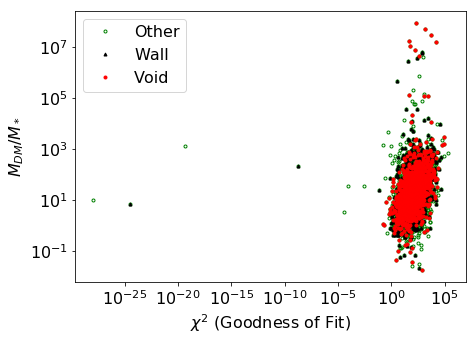

In [23]:
plt.figure( figsize=(7,5))

plt.loglog( avg_chi_square_rot_other, mass_ratio_other, 'go', markersize=msize, 
         fillstyle='none', label='Other')
plt.loglog( avg_chi_square_rot_wall, mass_ratio_wall, 'k^', markersize=msize, 
         label='Wall')
plt.loglog( avg_chi_square_rot_void, mass_ratio_void, 'ro', markersize=msize, 
         label='Void')

plt.xlabel('$\chi^2$ (Goodness of Fit)')
plt.ylabel('$M_{DM}/M_*$')
plt.legend()